# 4 Preprocessing and Training

## 4.1 Imports and Set Display

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [3]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2.2 Load  datasets

In [6]:
# load datasets
house = pd.read_csv('house_Nov02_2023.csv', index_col=0)
house.head()

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate,remodel,addition
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,NaN,3,6012,NaN,TRIANGLE,DR,NaN,RA,A,8,NaN,0,IX-3,2.00,740000,524503,392040,0778.03 40 5654 000,NaN,1,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508,ALL,1984.0,NaN,A,A,D,0,O,C,NaN,G,0,A,10,I,0,NaN,NaN,NaN,NaN,NaN,29.61,110,47,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6012TRIANGLEDRA,NaN,2012.0,2012.0,NaN,3.0,3,13.261294,CARY,1111.136263,7.3,No,No
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,NaN,43396,6408,NaN,OLD WESTGATE,RD,NaN,RA,NaN,8,NaN,0,IX-3,2.54,1650000,5013736,886242,0768.04 92 9999 000,NaN,1,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778,ALL,2015.0,NaN,A,A,D,0,B,C,NaN,A,0,A,0,I,0,NaN,NaN,NaN,NaN,NaN,29.71,130,99,NaN,0,NaN,0,0,A,NaN,19.0,RALEIGH,27617.0,6408OLD WESTGATERD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3,Yes,No
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,NaN,45910,8401,NaN,EBENEZER CHURCH,RD,NaN,RA,NaN,8,NaN,0,IX-3,0.97,105000,80884,171125,0777.02 69 6704 000,NaN,1,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616,E,1985.0,NaN,A,A,D,0,A,NaN,NaN,A,0,A,0,A,0,NaN,NaN,NaN,NaN,NaN,D-10,75,76,NaN,0,NaN,0,1,A,NaN,1.0,RALEIGH,27617.0,8401EBENEZER CHURCHRD,NaN,2012.0,2012.0,NaN,4.0,4,13.261294,CARY,1111.136263,7.3,No,No
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,NaN,47829,6508,NaN,MT HERMAN,RD,NaN,RA,NaN,8,NaN,0,IX-3,2.90,975000,1187520,409290,0768.02 86 1192 000,NaN,1,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,0217,GWRA001,ECGS,2005.0,0,20700,ALL,2010.0,NaN,A,A,NaN,0,O,C,NaN,A,64,A,64,I,0,NaN,NaN,NaN,NaN,NaN,29.55,100,91,NaN,0,NaN,0,0,A,NaN,20.0,RALEIGH,27617.0,6508MT HERMANRD,NaN,2012.0,2022.0,NaN,5.0,4,13.261294,CARY,1111.136263,7.3,Yes,Yes
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,NaN,65238,5917,NaN,TRIANGLE,DR,NaN,RA,NaN,8,NaN,0,IX-3,0.95,330000,300764,186219,0778.04 50 5768 000,NaN,1,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000,WSE,2000.0,NaN,A,A,NaN,0,O,C,NaN,A,54,A,54,I,0,NaN,NaN,NaN,NaN,NaN,41.61,110,75,NaN,0,NaN,0,0,A,NaN,82.0,RALEIGH,27617.0,5917TRIANGLEDR,NaN,2012.0,2012.0,NaN,12.0,12,13.261294,CARY,1111.136263,7.3,No,Yes


In [7]:
house.shape

(346129, 80)

In [8]:
house.dtypes

owner1                             object
owner2                             object
mailing_address1                   object
mailing_address2                   object
mailing_address3                   object
real_estate_id                      int64
street_number                       int64
street_prefix                      object
street_name                        object
street_type                        object
street_suffix                      object
planning_jurisdiction              object
street_misc                        object
township                            int64
fire_district                     float64
land_sale_price                     int64
zoning                             object
deeded_acreage                    float64
total_sale_price                    int64
assessed_building_value             int64
assessed_land_value                 int64
parcel_identification              object
special_district1                  object
billing_class                     

street_number is the numerical addresses of houses<br>

township is the township of the house located at, in this dataset, it use numbers 1-20 to represent 20 townships<br>

fire_district is the township of the house located at, in this dataset, it use numbers 23,24,26, but has lots of nan<br>

billing_class use number 1-6 to represent corporation, individuals, exempt, public service, life estate and HOA.<br>

type_and_use is the use of the house, it also use numbers to represent the use. for example, 1 means 1 family, 8 means townhouse, 11 means bank etc.<br>

<font color=red>**Although all these are numbers, but they should be treated as categorical variables.** 

In [9]:
house['township'] = house['township'].astype(str)
house['fire_district'] = house['fire_district'].astype(str)
house['billing_class'] = house['billing_class'].astype(str)
house['bath_fixtures'] = house['bath_fixtures'].astype(str)
house['type_and_use'] = house['type_and_use'].astype(str)
house['physical_zip_code'] =  house['physical_zip_code'].astype(str)

house['land_sale_month'] = house['land_sale_month'].astype(str)
house['total_sale_month'] = house['total_sale_month'].astype(str)
house['deed_month'] = house['deed_month'].astype(str)

Check statistics description to get lists of continuous variables and categorical variables quickly.

In [10]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,mailing_address3,real_estate_id,street_number,street_prefix,street_name,street_type,street_suffix,planning_jurisdiction,street_misc,township,fire_district,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,special_district1,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,special_write_in,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,roof_floor_system,interior_finish2_percent,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,built_in2_description,built_in3_description,built_in4_description,built_in5_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_code,land_deferred_amount,historic_deferred_code,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate,remodel,addition
count,346129,69626,346129,346127,5294,346129.000000,346129.000000,11098,346129,345010,369,346129,12740,346129,346129,3.461290e+05,346122,346129.000000,3.461290e+05,3.461290e+05,3.461290e+05,346129,2741,346129,346099,346121,345907,346129,346129,344909,340970.000000,346129.000000,346129.000000,343694,340967.000000,87,339750,339721,274117,346129.000000,339748,10550,3375.000000,339730,346129.000000,339752,346129.000000,339718,346129,267759,598,65,3,14,340971,346129.000000,346129.000000,394,3.461290e+05,214,3.461290e+05,346129.000000,345888,134531,346129,346129,346129,346129,138046.000000,346129.000000,346123.00000,346129,346129,346129,346129.000000,346129,346129.000000,346129.000000,346129,346129
unique,313166,65999,299440,74243,1782,NaN,NaN,8,18423,41,7,15,1045,20,4,NaN,313,NaN,NaN,NaN,NaN,346123,9,6,343364,23,17492,4031,5064,13201,NaN,NaN,NaN,15,NaN,40,15,15,6,NaN,26,6,NaN,7,NaN,3,NaN,10,75,21,13,13,2,14,276,NaN,NaN,1,NaN,1,NaN,NaN,19,18,104,19,39,345894,NaN,NaN,NaN,13,12,12,NaN,18,NaN,NaN,2,2
top,AC BLACKWOLF RUN OWNER LLC,BEAUTIFUL DREAMER APARTMENTS INC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,AGOURA HILLS CA 91301-2148,NaN,NaN,E,MAIN,DR,W,RA,101,20,nan,NaN,R-4,NaN,NaN,NaN,NaN,0785.12 85 1079 004,RML,2,LO1,R,-E-,0001,09WC900,09WC900,NaN,NaN,NaN,ALL,NaN,ROOM HSE,C,A,D,NaN,A,C,NaN,A,NaN,A,NaN,D,0,One Fireplace,Sprinkler Syste,Sprinkler Syste,1 Passenger Ele,04FIRPL,B,NaN,NaN,L,NaN,H,NaN,NaN,A,A,1.0,RALEIGH,27587.0,607SMAINST,NaN,NaN,NaN,nan,6.0,6,NaN,RALEIGH,NaN,NaN,No,No
freq,329,21,1683,1683,697,NaN,NaN,2956,665,110357,169,133841,863,36479,280890,NaN,43338,NaN,NaN,NaN,NaN,2,1335,315203,130,316762,1043,1240,978,976,NaN,NaN,NaN,255262,NaN,38,154927,250280,225220,NaN,171358,5337,NaN,336813,NaN,334211,NaN,134111,323404,254284,259,25,2,1,37118,NaN,NaN,394,NaN,214,NaN,NaN,316731,82744,324788,158004,23883,3,NaN,NaN,NaN,208079,36359,35720,NaN,85190,NaN,NaN,337291,331757
mean,NaN,NaN,NaN,NaN,NaN,252657.326375,2869.739493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.944629e+04,NaN,0.517736,3.902407e+05,3.160589e+05,1.084197e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.149218,1.145917,2848.997914,NaN,1999.582458,NaN,NaN,NaN,NaN,2.275666,NaN,NaN,47.039407,NaN,0.085532,NaN,0.180152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.107613,80.787004,NaN,7.002975e+02,NaN,4.707648e+02,1.215642,NaN,NaN,NaN,NaN,NaN,NaN,2005.259696,2011.243273,2013.26759,NaN,NaN,NaN,5.942477,NaN,1078.308440,4.452135,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,138064.605726,2951.655703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.309334e+05,NaN,2.494732,1.868029e+06,1.416445e+06,3.523910e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.914887,7.480297,10626.204848,NaN,15.017199,NaN,NaN,NaN,NaN,10.928221,NaN,NaN,29.399985,NaN,2.356503,NaN,3.099433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.078729,

<font color=red>Here, we use null mean as criterion, the other method is using percentage of number of unique. 

In [11]:
continuous_variables = list(des.columns[des.T['mean'].notna()])
categorical_variables = list(set(house.columns) - set(continuous_variables))

In [12]:
print(f"This dataset have {house.shape[1]} variables in total")
print(f"This dataset have {len(continuous_variables)} variables as continuous variables")
print(f"This dataset have {len(categorical_variables)} variables as categorical variables")

This dataset have 80 variables in total
This dataset have 26 variables as continuous variables
This dataset have 54 variables as categorical variables


Define some functions.

In [13]:
def cross_validate(data, estimator, test_p, n=5):
    train_r2 = []
    test_r2 = []
    train_mae = []
    test_mae = []
    train_rmse = []
    test_rmse = []
    train_length = int(np.floor(len(data)*(1-test_p)))
    res_train = pd.DataFrame(index=range(train_length))
    res_test = pd.DataFrame(index=range(len(data)-train_length))
    
    # check if all continuous
    if np.all(data.dtypes.values) in ['int', 'float']:
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            #scale
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            est = estimator.fit(X_train_scaled, y_train)
            y_train_pred = est.predict(X_train_scaled)
            y_test_pred = est.predict(X_test_scaled)
            
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    else:               # for continuous and categorical
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            # separate continuous and categorical
            con_var_data = X_train.select_dtypes(['int', 'float']).columns
            X_train_num = X_train[con_var_data]
            X_test_num = X_test[con_var_data]
            X_train_cat = X_train.drop(con_var_data, axis=1)
            X_test_cat = X_test.drop(con_var_data, axis=1)
            # only scale continuous
            scaler = StandardScaler()
            scaler.fit(X_train_num)
            X_train_num.iloc[:,:] = scaler.transform(X_train_num)
            X_test_num.iloc[:,:] = scaler.transform(X_test_num)
            # combine back
            X_train_scaled = pd.concat([X_train_num, X_train_cat], axis=1)
            X_test_scaled = pd.concat([X_test_num, X_test_cat], axis=1)

            est = estimator.fit(X_train_scaled, y_train)
            y_train_pred = est.predict(X_train_scaled)
            y_test_pred = est.predict(X_test_scaled)
        
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    res_metrics = pd.DataFrame(index=range(n), data={'train_r2':train_r2, 'test_r2':test_r2,
                            'train_mae':train_mae, 'test_mae':test_mae,
                            'train_rmse':train_rmse, 'test_rmse':test_rmse})
    return res_train, res_test, res_metrics

In [14]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)    #  set not visible about empty axes.

In [15]:
def residual_plot(y_train, y_train_pred, y_test, y_test_pred, figsize=(15, 10)):

    fig, ax = plt.subplots(3, 2, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)

    ax[0,0].scatter(y_train, y_train_pred)
    ax[0,0].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,0].set_xlabel('y train true')
    ax[0,0].set_ylabel('y train predict')

    ax[0,1].scatter(y_test, y_test_pred)
    ax[0,1].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,1].set_xlabel('y test true')
    ax[0,1].set_ylabel('y test predict')

    residuals_train = y_train.values - y_train_pred
    sns.kdeplot(residuals_train, fill=True, ax=ax[1,0])
    ax[1,0].set_xlabel('Residuals')

    sm.qqplot(residuals_train, ax=ax[1,1])
    ax[1,1].set_title("QQ Plot of Residuals")

    sns.scatterplot(x=y_train_pred, y=residuals_train, ax=ax[2,0])
    ax[2,0].plot([0,0.75*10**6],[0,0], color='red')


## Exp_1 Use All Continuous Variables

In [16]:
df_1 = house.copy()
df_1 = df_1[continuous_variables]
# drop missing percentage more than 50%.
df_1 = df_1.drop(['interior_finish2_percent', 'land_sale_year'], axis=1)   

In [17]:
df_1['year_built'] = df_1['year_built'].fillna(df_1['year_built'].median())
df_1['effective_year'] = df_1['effective_year'].fillna(df_1['effective_year'].median())
df_1['deed_year'] = df_1['deed_year'].fillna(df_1['deed_year'].median())

In [18]:
df_1.isna().sum()

real_estate_id                    0
street_number                     0
land_sale_price                   0
deeded_acreage                    0
total_sale_price                  0
assessed_building_value           0
assessed_land_value               0
year_built                        0
units                             0
heated_area                       0
effective_year                    0
foundation_basement_percent       0
heat_percent                      0
air_percent                       0
assessed_grade_difference         0
accrued_assessed_condition_pct    0
land_deferred_amount              0
historic_deferred_amount          0
recycled_units                    0
total_sale_year                   0
deed_year                         0
distance_nearest_city             0
population_per_square_mile        0
unemployment_rate                 0
dtype: int64

In [19]:
X = df_1.drop('total_sale_price', axis=1)
y = df_1['total_sale_price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [21]:
X_train.shape, X_test.shape

((328822, 23), (17307, 23))

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lr_1 = LinearRegression().fit(X_train_scaled, y_train)

In [24]:
y_train_pred = lr_1.predict(X_train_scaled)
y_test_pred = lr_1.predict(X_test_scaled)

In [25]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.755149330649981 0.8019196245299011
MAE 114406.55705875377 114656.2605292991
RMSE 927024.7990315943 784172.5912996884


In [26]:
estimator = LinearRegression()

In [27]:
res_train_1, res_test_1, res_metrics_1 = cross_validate(df_1, estimator, test_p=0.05, n=10)

In [28]:
res_metrics_1

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.758819,0.719946,113446.509732,113402.650066,919111.906979,9.526566e+05
1,0.758710,0.728492,114223.085652,124626.380666,917504.661067,9.752388e+05
2,0.804193,-0.859687,105304.167714,122135.270169,828559.607663,2.430075e+06
3,0.752203,0.839184,113745.955230,114527.469681,926148.543942,8.041970e+05
4,0.757477,0.750867,114275.404141,118174.738998,924491.695174,8.399369e+05
5,0.755362,0.784509,113458.978944,121305.571713,919848.245705,9.371179e+05
6,0.748433,0.870290,115289.092130,112507.599513,926809.472167,7.984375e+05
7,0.751757,0.857000,114942.524281,111137.076578,930318.485895,7.122496e+05
8,0.757611,0.737480,115084.660693,111723.492376,932287.993476,6.600741e+05
9,0.758296,0.723097,114908.027880,106053.438214,928072.600588,7.594357e+05


## Hyperparameter Table

In [32]:
hyperparameter_table = pd.read_excel('hyperparameters_table.xlsx', index_col=0)
hyperparameter_table = hyperparameter_table.to_dict()
hyperparameter_table

{'Model_Name': {1: 'Linear Regression'},
 'Exp': {1: 1},
 'Dropna_Thres%': {1: nan},
 'Drop_Dupe': {1: 'Yes'},
 'n_Num_Feats': {1: 0},
 'n_Cat_Feats': {1: nan},
 'Cat_Feats_Encode': {1: nan},
 'Test_P%': {1: nan},
 'Scale': {1: 'Yes'},
 'Cross_Val': {1: 'Yes'},
 'N_of_Shuffle': {1: 100},
 'Train_RMSE_mean': {1: '300k'},
 'Train_RMSE_std': {1: '11k'},
 'Test_RMSE_mean': {1: '326k'},
 'Test_RMSE_std': {1: '29k'}}

In [33]:
param_names = list(hyperparameter_table.keys())
param_values = ['Linear Regression', 1, 50, 'Yes', 23, 0, 'N/A', 5, 'Yes', 'Yes', 10,
                res_metrics_1['train_rmse'].mean(), res_metrics_1['train_rmse'].std(), 
                res_metrics_1['test_rmse'].mean(), res_metrics_1['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][1] = value
    
hyperparameter_table

{'Model_Name': {1: 'Linear Regression'},
 'Exp': {1: 1},
 'Dropna_Thres%': {1: 50},
 'Drop_Dupe': {1: 'Yes'},
 'n_Num_Feats': {1: 23},
 'n_Cat_Feats': {1: 0},
 'Cat_Feats_Encode': {1: 'N/A'},
 'Test_P%': {1: 5},
 'Scale': {1: 'Yes'},
 'Cross_Val': {1: 'Yes'},
 'N_of_Shuffle': {1: 10},
 'Train_RMSE_mean': {1: 915315.3212655254},
 'Train_RMSE_std': {1: 30868.724376321003},
 'Test_RMSE_mean': {1: 986941.9077726817},
 'Test_RMSE_std': {1: 517582.5770084782}}

## Result Analysis Exp_1

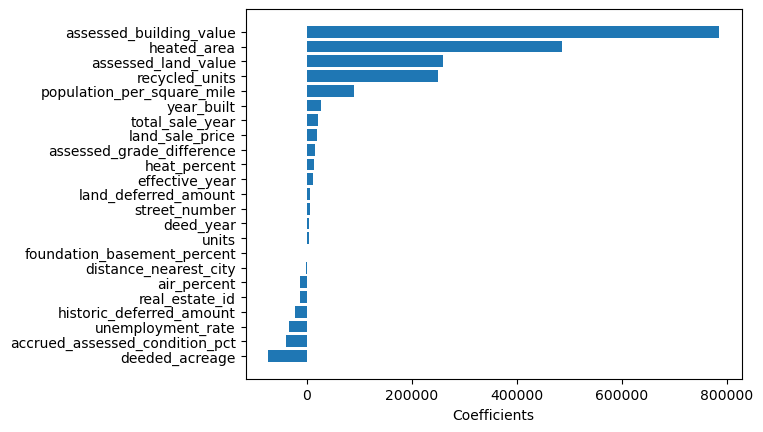

In [35]:
coefficients = lr_1.coef_
feature_names = X_train.columns     

sort_index = np.argsort(coefficients)

sorted_coefs = coefficients[sort_index]
sorted_feature_names = feature_names[sort_index]

plt.barh(sorted_feature_names, sorted_coefs)
plt.xlabel('Coefficients')
plt.show()

In [36]:
sorted_feature_names

Index(['deeded_acreage', 'accrued_assessed_condition_pct', 'unemployment_rate',
       'historic_deferred_amount', 'real_estate_id', 'air_percent',
       'distance_nearest_city', 'foundation_basement_percent', 'units',
       'deed_year', 'street_number', 'land_deferred_amount', 'effective_year',
       'heat_percent', 'assessed_grade_difference', 'land_sale_price',
       'total_sale_year', 'year_built', 'population_per_square_mile',
       'recycled_units', 'assessed_land_value', 'heated_area',
       'assessed_building_value'],
      dtype='object')

In [38]:
for i in sorted_feature_names:
    print(f"feature_name:{i}")
    print(f"Most_Common_Percentage:{df_1[i].value_counts().iloc[0]/df_1.shape[0]*100}")

feature_name:deeded_acreage
Most_Common_Percentage:4.667335010935229
feature_name:accrued_assessed_condition_pct
Most_Common_Percentage:8.909683961759923
feature_name:unemployment_rate
Most_Common_Percentage:9.590066131413433
feature_name:historic_deferred_amount
Most_Common_Percentage:99.91592729878167
feature_name:real_estate_id
Most_Common_Percentage:0.00028890962617983466
feature_name:air_percent
Most_Common_Percentage:99.54410060988822
feature_name:distance_nearest_city
Most_Common_Percentage:6.900028602052992
feature_name:foundation_basement_percent
Most_Common_Percentage:95.30666312270858
feature_name:units
Most_Common_Percentage:94.31512528565939
feature_name:deed_year
Most_Common_Percentage:9.922890020772602
feature_name:street_number
Most_Common_Percentage:0.7442311970392541
feature_name:land_deferred_amount
Most_Common_Percentage:99.88616960728514
feature_name:effective_year
Most_Common_Percentage:4.325554923164485
feature_name:heat_percent
Most_Common_Percentage:99.84312207

Drop independent variables with high repetitions and low coefficients.

In [40]:
continuous_variables_df_1 = ['deeded_acreage', 'accrued_assessed_condition_pct', 'unemployment_rate',
                             'real_estate_id', 'effective_year', 'assessed_grade_difference', 
                             'land_sale_price','total_sale_year', 'year_built', 
                             'population_per_square_mile', 'assessed_land_value',
                             'heated_area','assessed_building_value', 'total_sale_price']

## Exp_2 Use Selected Continuous Variables

In [41]:
df_2 = df_1.copy()
df_2 = df_2[continuous_variables_df_1]

In [42]:
X = df_2.drop('total_sale_price', axis=1)
y = df_2['total_sale_price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [44]:
X_train.shape, X_test.shape

((328822, 13), (17307, 13))

In [45]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
lr_2 = LinearRegression().fit(X_train_scaled, y_train)

In [47]:
y_train_pred = lr_2.predict(X_train_scaled)
y_test_pred = lr_2.predict(X_test_scaled)

In [48]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.7472748266025753 0.7965543204640297
MAE 116892.15262663148 116513.40034811414
RMSE 941813.596833067 794721.8781783002


In [49]:
estimator = LinearRegression()

In [51]:
res_train_2, res_test_2, res_metrics_2 = cross_validate(df_2, estimator, test_p=0.05, n=10)

In [52]:
res_metrics_2

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.744728,0.831588,116322.786722,115180.419254,941524.339866,8.010470e+05
1,0.741422,0.829430,116784.507636,124853.861311,930506.434073,1.025707e+06
2,0.745800,0.793458,116609.108159,115485.369523,929968.296526,1.031180e+06
3,0.764696,0.464857,115397.315787,118385.255704,905399.088856,1.387662e+06
4,0.745462,0.818419,116952.497734,113992.097261,940393.715991,8.283560e+05
5,0.750739,0.734883,114495.802745,128640.579277,916400.850718,1.237468e+06
6,0.747483,0.776106,117436.443571,124535.813286,932797.935288,9.835890e+05
7,0.755343,0.553046,117087.505795,115575.851857,934011.622515,9.550686e+05
8,0.743265,0.846729,117463.269418,116645.282328,942738.753705,7.846308e+05
9,0.752300,0.680428,115309.798410,113175.080692,933705.753294,9.656468e+05


<font color=red>Almost no changes comapred with Exp_1, now try to remove outliers

## Hyperparameter Table_updated

In [77]:
param_values = ['Linear Regression', 2, 50, 'Yes', 13, 0, 'N/A', 5, 'Yes', 'Yes', 10,
                res_metrics_2['train_rmse'].mean(), res_metrics_2['train_rmse'].std(), 
                res_metrics_2['test_rmse'].mean(), res_metrics_2['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][2] = value
    
hyperparameter_table

{'Model_Name': {1: 'Linear Regression',
  2: 'Linear Regression',
  3: 'Linear Regression'},
 'Exp': {1: 1, 2: 2, 3: 3},
 'Dropna_Thres%': {1: 50, 2: 50, 3: 50},
 'Drop_Dupe': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'n_Num_Feats': {1: 23, 2: 13, 3: 13},
 'n_Cat_Feats': {1: 0, 2: 0, 3: 0},
 'Cat_Feats_Encode': {1: 'N/A', 2: 'N/A', 3: 'N/A'},
 'Test_P%': {1: 5, 2: 5, 3: 5},
 'Scale': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'Cross_Val': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'N_of_Shuffle': {1: 10, 2: 10, 3: 10},
 'Train_RMSE_mean': {1: 915315.3212655254,
  2: 930744.6790833201,
  3: 915315.3212655254},
 'Train_RMSE_std': {1: 30868.724376321003,
  2: 11669.635115164454,
  3: 30868.724376321003},
 'Test_RMSE_mean': {1: 986941.9077726817,
  2: 1000035.5723675744,
  3: 986941.9077726817},
 'Test_RMSE_std': {1: 517582.5770084782,
  2: 190671.96912925135,
  3: 517582.5770084782}}

## Outliers Analysis

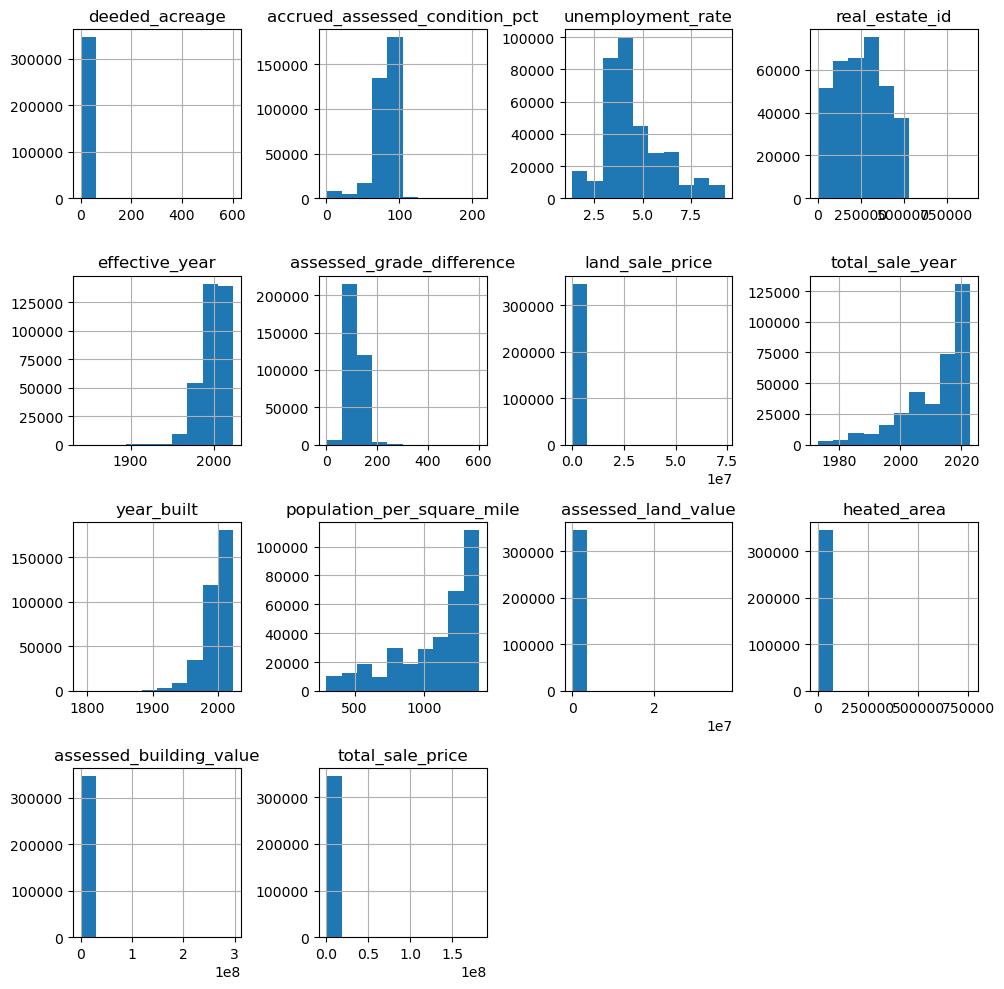

In [57]:
df_2.hist(figsize=(10,10))
plt.tight_layout();

In [58]:
df_2.columns

Index(['deeded_acreage', 'accrued_assessed_condition_pct', 'unemployment_rate',
       'real_estate_id', 'effective_year', 'assessed_grade_difference',
       'land_sale_price', 'total_sale_year', 'year_built',
       'population_per_square_mile', 'assessed_land_value', 'heated_area',
       'assessed_building_value', 'total_sale_price'],
      dtype='object')

deeded_acreage, land_sale_price, assessed_land_value, heated_area, assessed_building_value are very skewed, means they have outliers

<font color=red>The simplest method to treat the outliers is removing them. This is easy but will cause information loss.
    
<font color=red>The other method to treat the outliers is add new column called 'variables_has_outlier' and set the value to 1 if it has outliers, else 0. This method can protect the infomation, but will make the dataframe bigger, especially for this with more than 300000 rows. For smaller dataframe, this method is better.
    
<font color=red> For this dataframe, we use the simple method to treat outliers, i.e. drop them directly.

In [60]:
q_deeded_acreage = df_2['deeded_acreage'].quantile(0.95)
q_land_sale_price = df_2['land_sale_price'].quantile(0.95)
q_assessed_land_value = df_2['assessed_land_value'].quantile(0.95)
q_heated_area = df_2['heated_area'].quantile(0.95)
q_assessed_building_value = df_2['assessed_building_value'].quantile(0.95)

Also filter the outliers in total_sale_price

In [61]:
q_total_sale_price = df_2['total_sale_price'].quantile(0.95)

Let's check the shape of dataframe.

In [62]:
df_2[(df_2['deeded_acreage']<q_deeded_acreage)&(df_2['land_sale_price']<q_land_sale_price)&\
     (df_2['assessed_land_value']<q_assessed_land_value)&(df_2['heated_area']<q_heated_area)&\
     (df_2['assessed_building_value']<q_assessed_building_value)&\
     (df_2['total_sale_price']<q_total_sale_price)].shape

(290943, 14)

## Exp_3 Remove Outliers in Selected Continuous Variables

In [63]:
df_3 = df_2.copy()
df_3 = df_3[(df_3['deeded_acreage']<q_deeded_acreage)&(df_3['land_sale_price']<q_land_sale_price)&\
     (df_3['assessed_land_value']<q_assessed_land_value)&(df_3['heated_area']<q_heated_area)&\
     (df_3['assessed_building_value']<q_assessed_building_value)&(df_3['total_sale_price']<q_total_sale_price)]

In [64]:
X = df_3.drop('total_sale_price', axis=1)
y = df_3['total_sale_price']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [66]:
X_train.shape, X_test.shape

((276395, 13), (14548, 13))

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
lr_3 = LinearRegression().fit(X_train_scaled, y_train)

In [69]:
y_train_pred = lr_3.predict(X_train_scaled)
y_test_pred = lr_3.predict(X_test_scaled)

In [70]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8117000210560069 0.8200913713317526
MAE 44783.342834175084 44008.92563136487
RMSE 61964.49872471275 60743.06803937359


In [71]:
estimator = LinearRegression()

In [72]:
res_train_3, res_test_3, res_metrics_3 = cross_validate(df_3, estimator, test_p=0.05, n=10)

In [73]:
res_metrics_3

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.812352,0.807841,44710.279026,45207.545083,61839.923855,63108.008888
1,0.812162,0.811373,44711.622837,45114.180410,61883.728528,62288.147879
2,0.812475,0.805331,44716.964397,45041.050559,61856.648726,62797.083924
3,0.812242,0.809806,44733.089953,44773.139823,61885.496065,62254.630748
4,0.812544,0.804279,44699.202713,45292.465434,61799.807672,63851.003805
5,0.811766,0.818882,44757.068226,44334.692871,61965.003492,60735.467650
6,0.812350,0.807788,44727.696546,44942.707833,61869.259581,62559.395679
7,0.812079,0.812936,44729.176435,44849.350347,61892.798139,62116.783494
8,0.811831,0.817621,44747.319738,44489.940451,61944.144744,61135.243600
9,0.811966,0.815021,44725.926192,44818.103166,61904.019024,61902.888062


In [74]:
res_metrics_3['test_rmse'].mean()

62274.86537287709

## Hyperparameter Table_updated

In [78]:
param_values = ['Linear Regression', 3, 50, 'Yes', 13, 0, 'N/A', 5, 'Yes', 'Yes', 10,
                res_metrics_3['train_rmse'].mean(), res_metrics_3['train_rmse'].std(), 
                res_metrics_3['test_rmse'].mean(), res_metrics_3['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][3] = value
    
hyperparameter_table

{'Model_Name': {1: 'Linear Regression',
  2: 'Linear Regression',
  3: 'Linear Regression'},
 'Exp': {1: 1, 2: 2, 3: 3},
 'Dropna_Thres%': {1: 50, 2: 50, 3: 50},
 'Drop_Dupe': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'n_Num_Feats': {1: 23, 2: 13, 3: 13},
 'n_Cat_Feats': {1: 0, 2: 0, 3: 0},
 'Cat_Feats_Encode': {1: 'N/A', 2: 'N/A', 3: 'N/A'},
 'Test_P%': {1: 5, 2: 5, 3: 5},
 'Scale': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'Cross_Val': {1: 'Yes', 2: 'Yes', 3: 'Yes'},
 'N_of_Shuffle': {1: 10, 2: 10, 3: 10},
 'Train_RMSE_mean': {1: 915315.3212655254,
  2: 930744.6790833201,
  3: 61884.08298272508},
 'Train_RMSE_std': {1: 30868.724376321003,
  2: 11669.635115164454,
  3: 47.90707939512389},
 'Test_RMSE_mean': {1: 986941.9077726817,
  2: 1000035.5723675744,
  3: 62274.86537287709},
 'Test_RMSE_std': {1: 517582.5770084782,
  2: 190671.96912925135,
  3: 904.5831565886718}}

In [94]:
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,n_Num_Feats,n_Cat_Feats,Cat_Feats_Encode,Test_P%,Scale,Cross_Val,N_of_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,50,Yes,23,0,N/A,5,Yes,Yes,10,915315.321266,30868.724376,9.869419e+05,517582.577008
2,Linear Regression,2,50,Yes,13,0,N/A,5,Yes,Yes,10,930744.679083,11669.635115,1.000036e+06,190671.969129
3,Linear Regression,3,50,Yes,13,0,N/A,5,Yes,Yes,10,61884.082983,47.907079,6.227487e+04,904.583157


## Exp_4 Select Categorical Variables

In [80]:
df_4 = house.iloc[df_3.index]

In [82]:
df_4_unique = pd.DataFrame(data=df_4[categorical_variables].nunique().sort_values())
df_4_unique = df_4_unique.rename(columns={0:'unique_counts'})

In [83]:
df_4_missing = pd.DataFrame(data=df_4[categorical_variables].isna().mean())
df_4_missing = df_4_missing.rename(columns={0:'missing_counts'})

In [84]:
df_4_unique_missing = pd.merge(df_4_unique, df_4_missing, left_index=True, right_index=True)
df_4_unique_missing

,unique_counts,missing_counts
built_in4_description,0,1.000000
built_in5_description,0,1.000000
built_in3_description,0,1.000000
historic_deferred_code,1,0.999478
land_deferred_code,1,0.999952
remodel,2,0.000000
addition,2,0.000000
air,3,0.014188
built_in2_description,3,0.999790
fire_district,4,0.000000


<font color=red>Select categorical variables with missing less than 90% and unique counts less than 100

In [92]:
categorical_variables_df_4 = df_4_unique_missing[(df_4_unique_missing['unique_counts']<10000)&\
                                               (df_4_unique_missing['missing_counts']<0.9)].index.to_list()

len(categorical_variables_df_4)

32

In [93]:
categorical_variables_df_4

['remodel',
 'addition',
 'air',
 'fire_district',
 'built_in1_description',
 'billing_class',
 'foundation_basement',
 'heat',
 'bath',
 'story_height',
 'deed_month',
 'total_sale_month',
 'land_sale_month',
 'planning_jurisdiction',
 'design_style',
 'utilities',
 'land_disq_and_qual_flag',
 'nearest_city',
 'physical_city',
 'disq_and_qual_flag',
 'township',
 'land_classification',
 'exterior_wall',
 'bath_fixtures',
 'street_type',
 'physical_zip_code',
 'type_and_use',
 'grade',
 'zoning',
 'deed_page',
 'vcs',
 'property_index']

## Exp_5

In [90]:
df_5 = house.iloc[df_4.index]

In [91]:
df_5['effective_year'] = df_5['effective_year'].fillna(df_5['effective_year'].median())
df_5['year_built'] = df_5['year_built'].fillna(df_5['year_built'].median())

In [69]:
def cat_var_selector(df, con_vars, cat_vars):
    res = {}
    for var in cat_vars:
        df_exp = df[con_vars+[var]]
        df_exp[var] = df_exp[var].fillna(df_exp[var].mode()[0])
        df_exp = pd.get_dummies(df_exp)
        res_train, res_test, res_metrics = cross_validate(df_exp, test_p=0.05, n=50)
        res[var] = res_metrics['test_rmse'].mean()
    return res

In [359]:
cat_var_selector(df_13, continuous_variables_df_9, categorical_variables_df_12)

{'addition': 61811.37567353861,
 'remodel': 61993.24048288133,
 'air': 61858.1190056006,
 'fire_district': 2551778918646.042,
 'built_in1_description': 62010.02270345015,
 'foundation_basement': 61830.61846680304,
 'billing_class': 61458.946805179046,
 'heat': 61932.29072903505,
 'story_height': 61958.06857045287,
 'bath': 61792.553983145066,
 'deed_month': 61971.52487586465,
 'total_sale_month': 61993.029702946966,
 'land_sale_month': 61750.6478536403,
 'planning_jurisdiction': 61738.72071232377,
 'design_style': 61480.48243401019,
 'utilities': 61835.0162040561,
 'nearest_city': 61834.43702686228,
 'land_disq_and_qual_flag': 1760549519243.4019,
 'disq_and_qual_flag': 59988.4438780179,
 'physical_city': 61932.665741165,
 'township': 61562.180142865654,
 'land_classification': 328859303043.96045,
 'exterior_wall': 7688971398620.44,
 'bath_fixtures': 61953.55147855388,
 'street_type': 489322460129.30237,
 'physical_zip_code': 61601.27824600137,
 'type_and_use': 4858520042183.214}

In [70]:
categorical_variables_df_13 = ['addition','remodel','air','built_in1_description','foundation_basement',
 'billing_class','heat','story_height','bath','deed_month','total_sale_month','land_sale_month',
 'planning_jurisdiction','design_style','utilities','nearest_city','land_disq_and_qual_flag',
'disq_and_qual_flag','physical_city','township','bath_fixtures','physical_zip_code']

## Exp_14

In [71]:
df_14 = house.iloc[df_11.index]

In [72]:
df_14 = df_14[continuous_variables_df_9+['disq_and_qual_flag']]

In [73]:
df_14.isna().sum()

deeded_acreage                       0
accrued_assessed_condition_pct       0
unemployment_rate                    0
real_estate_id                       0
effective_year                    3145
assessed_grade_difference            0
land_sale_price                      0
total_sale_year                      0
year_built                        3142
population_per_square_mile           0
assessed_land_value                  0
heated_area                          0
assessed_building_value              0
total_sale_price                     0
disq_and_qual_flag                 186
dtype: int64

In [74]:
df_14['effective_year'] = df_14['effective_year'].fillna(df_14['effective_year'].median())
df_14['year_built'] = df_14['year_built'].fillna(df_14['year_built'].median())

In [75]:
#df_14['air'] = df_14['air'].fillna(df_14['air'].mode()[0])
#df_14['built_in1_description'] = df_14['built_in1_description'].fillna(df_14['built_in1_description'].mode()[0])
#df_14['foundation_basement'] = df_14['foundation_basement'].fillna(df_14['foundation_basement'].mode()[0])
#df_14['heat'] = df_14['heat'].fillna(df_14['heat'].mode()[0])
#df_14['story_height'] = df_14['story_height'].fillna(df_14['story_height'].mode()[0])
#df_14['bath'] = df_14['bath'].fillna(df_14['bath'].mode()[0])
#df_14['design_style'] = df_14['design_style'].fillna(df_14['design_style'].mode()[0])
#df_14['utilities'] = df_14['utilities'].fillna(df_14['utilities'].mode()[0])
#df_14['land_disq_and_qual_flag'] = df_14['land_disq_and_qual_flag'].fillna(df_14['land_disq_and_qual_flag'].mode()[0])
df_14['disq_and_qual_flag'] = df_14['disq_and_qual_flag'].fillna(df_14['disq_and_qual_flag'].mode()[0])

In [76]:
df_14 = pd.get_dummies(df_14)

In [77]:
X = df_14.drop('total_sale_price', axis=1)
y = df_14['total_sale_price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [79]:
X_train.shape, X_test.shape

((276395, 32), (14548, 32))

In [80]:
continuous_variables_df_14 = X_train.select_dtypes(['int', 'float']).columns

In [81]:
X_train_num = X_train[continuous_variables_df_14]
X_test_num = X_test[continuous_variables_df_14]
X_train_cat = X_train.drop(continuous_variables_df_14, axis=1)
X_test_cat = X_test.drop(continuous_variables_df_14, axis=1)

In [82]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num.iloc[:,:] = scaler.transform(X_train_num)
X_test_num.iloc[:,:] = scaler.transform(X_test_num)

In [83]:
X_train_scaled = pd.concat([X_train_num, X_train_cat], axis=1)

In [84]:
X_test_scaled = pd.concat([X_test_num, X_test_cat], axis=1)

In [85]:
lr_14 = LinearRegression().fit(X_train_scaled, y_train)

In [86]:
y_train_pred = lr_14.predict(X_train_scaled)
y_test_pred = lr_14.predict(X_test_scaled)

In [87]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8223557469160674 0.8282602880872878
MAE 43742.20017004649 43002.77825130602
RMSE 60185.70971921251 59348.00055876182


In [88]:
estimator = LinearRegression()

In [89]:
res_train_14, res_test_14, res_metrics_14 = cross_validate(df_14, estimator, test_p=0.05, n=20)

In [90]:
res_metrics_14['test_rmse'].mean()

59847.05561068382

## Exp_15

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rf_2 = RandomForestRegressor(n_estimators=200, max_depth=20, n_jobs=-1).fit(X_train_scaled, y_train)

In [112]:
y_train_pred = rf_2.predict(X_train_scaled)
y_test_pred = rf_2.predict(X_test_scaled)

In [113]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9867242450888617 0.9480478563025566
MAE 11185.115981967037 19930.421588408233
RMSE 16453.08790576629 32641.677026817208


In [114]:
individual_trees = rf_2.estimators_
max_depths = [tree.tree_.max_depth for tree in individual_trees]
# Print or analyze the max depths
print("Max Depths of individual trees:", max_depths)

Max Depths of individual trees: [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [262]:
estimator = RandomForestRegressor(n_estimators=200, max_depth=20, n_jobs=-1)

In [263]:
res_train_15, res_test_15, res_metrics_15 = cross_validate(df_14, estimator, test_p=0.05, n=5)

In [264]:
res_metrics_15['test_rmse'].mean()

37249.48078591344

## Exp_16 Gradient Boost Regression

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
gb_2 = GradientBoostingRegressor(n_estimators=200, max_depth=20).fit(X_train_scaled, y_train)

In [118]:
y_train_pred = gb_2.predict(X_train_scaled)
y_test_pred = gb_2.predict(X_test_scaled)

In [119]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9999720459924164 0.9369789880383766
MAE 504.9974885871297 21050.70787352843
RMSE 754.9876443965638 35951.20184435772


In [ ]:
estimator = GradientBoostingRegressor(n_estimators=200, max_depth=20, n_jobs=-1)

In [193]:
res_train_16, res_test_16, res_metrics_16 = cross_validate(df_14, estmator, test_p=0.05, n=20)

In [194]:
res_metrics_16['test_rmse'].mean()

59950.170536826095

## Exp_8 XGBoost Regression

In [120]:
import xgboost as xgb

In [124]:
xgb_1 = xgb.XGBRegressor(n_estimators=200, max_depth=20, n_jobs=-1).fit(X_train_scaled, y_train)

In [125]:
y_train_pred = xgb_1.predict(X_train_scaled)
y_test_pred = xgb_1.predict(X_test_scaled)

In [126]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.999885207805706 0.944834994570889
MAE 912.138492348318 20117.439598702324
RMSE 1529.938536277717 33635.86182212908


In [ ]:
param_names = list(hyperparameter_table.keys())
param_values = ['XGBoost Regression', 7, X_train.shape[1], 'No', 'Mean', 0.5, 0.05, 'Yes', 'Yes', 'No', 0,
                np.sqrt(mean_squared_error(y_train, y_train_pred)), 0,  np.sqrt(mean_squared_error(y_test, y_test_pred)), 0]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][8] = value
    
hyperparameter_table